In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Import citipy
from citipy import citipy

In [7]:
# We create a cities list to store city names.
cities = []
# We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

625

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# We create the for loop with the enumerate() method and reference the index and the city in the list.
for i, city in enumerate(cities):

    # In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0
    # and if the index is greater than or equal to 50.
    if (i % 50 == 0 and i >= 50):
        # If the statement is true, then the set_count and the record_count are equal to 1.
        set_count += 1
        record_count = 1
    # Inside the conditional statement, we create the URL endpoint for each city, as before.
    # However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+").
    # This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    city_url = url + "&q=" + city.replace(" ","+")

    # We add a print statement that tells us the record count and set count, and the city that is being processed.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # We add one to the record count before the next city is processed.
    record_count += 1

    # TRY-EXCEPT BLOCKS (6.2.6)
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | marsa matruh
Processing Record 4 of Set 1 | fort beaufort
Processing Record 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | north bend
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | cabinda
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | sept-iles
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | radcliff
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | mastic beach
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | veraval
Processing Record 21 of Set 1 | cayenne
Processing Record 22 of Set 1 | mendota
Processing Record 2

City not found. Skipping...
Processing Record 40 of Set 4 | barrow
Processing Record 41 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 4 | kununurra
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 45 of Set 4 | sosnovka
Processing Record 46 of Set 4 | jalingo
Processing Record 47 of Set 4 | lata
Processing Record 48 of Set 4 | tasiilaq
Processing Record 49 of Set 4 | haradok
Processing Record 50 of Set 4 | thompson
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | mahibadhoo
Processing Record 3 of Set 5 | sharjah
Processing Record 4 of Set 5 | znamenskoye
Processing Record 5 of Set 5 | elizabeth city
Processing Record 6 of Set 5 | devaprayag
Processing Record 7 of Set 5 | alunitdag
City not found. Skipping...
Processing Record 8 of Set 5 | fallon
Processing Record 9 of Set 5 | clifton
Processing Record 10 of Set 5 | belmonte
Processing Record 11 of Set 5 

Processing Record 29 of Set 8 | zarate
Processing Record 30 of Set 8 | ambatondrazaka
Processing Record 31 of Set 8 | linhares
Processing Record 32 of Set 8 | taltal
Processing Record 33 of Set 8 | general roca
Processing Record 34 of Set 8 | sumbe
Processing Record 35 of Set 8 | jalu
Processing Record 36 of Set 8 | cockburn town
Processing Record 37 of Set 8 | puerto baquerizo moreno
Processing Record 38 of Set 8 | marcona
City not found. Skipping...
Processing Record 39 of Set 8 | quang ngai
Processing Record 40 of Set 8 | hailey
Processing Record 41 of Set 8 | loandjili
Processing Record 42 of Set 8 | pervoye maya
Processing Record 43 of Set 8 | brokopondo
Processing Record 44 of Set 8 | charlestown
Processing Record 45 of Set 8 | beringovskiy
Processing Record 46 of Set 8 | fredericksburg
Processing Record 47 of Set 8 | maues
Processing Record 48 of Set 8 | severo-kurilsk
Processing Record 49 of Set 8 | alofi
Processing Record 50 of Set 8 | gold coast
Processing Record 1 of Set 9 |

Processing Record 15 of Set 12 | sergiyevsk
Processing Record 16 of Set 12 | demyansk
Processing Record 17 of Set 12 | tabuk
Processing Record 18 of Set 12 | sulphur
Processing Record 19 of Set 12 | malatya
Processing Record 20 of Set 12 | gat
Processing Record 21 of Set 12 | harper
Processing Record 22 of Set 12 | tamandare
Processing Record 23 of Set 12 | derzhavinsk
Processing Record 24 of Set 12 | birao
Processing Record 25 of Set 12 | belyy yar
Processing Record 26 of Set 12 | coos bay
Processing Record 27 of Set 12 | nioro
Processing Record 28 of Set 12 | gravdal
Processing Record 29 of Set 12 | saint anthony
Processing Record 30 of Set 12 | inhambane
Processing Record 31 of Set 12 | tawzar
City not found. Skipping...
Processing Record 32 of Set 12 | buraydah
Processing Record 33 of Set 12 | sinjar
Processing Record 34 of Set 12 | la asuncion
Processing Record 35 of Set 12 | kitimat
Processing Record 36 of Set 12 | mahon
Processing Record 37 of Set 12 | samoded
Processing Record 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.67,-52.73,51.01,53,75,21.92,CA,2020-10-10 15:32:25
1,Albany,42.60,-73.97,66.99,56,0,7.45,US,2020-10-10 15:31:29
2,Marsa Matruh,31.35,27.25,75.07,67,2,12.37,EG,2020-10-10 15:32:25
3,Fort Beaufort,-32.77,26.63,51.01,72,97,10.94,ZA,2020-10-10 15:32:26
4,North Bend,43.41,-124.22,62.01,100,90,10.29,US,2020-10-10 15:29:17
5,Ponta Do Sol,32.67,-17.10,75.00,69,40,16.11,PT,2020-10-10 15:32:26
6,Cabinda,-5.55,12.20,86.00,58,20,9.17,AO,2020-10-10 15:32:26
7,Clyde River,70.47,-68.59,33.80,93,90,29.97,CA,2020-10-10 15:32:27
8,Vaini,-21.20,-175.20,73.40,88,75,6.93,TO,2020-10-10 15:32:27
9,Sept-Iles,50.20,-66.38,33.01,93,90,6.93,CA,2020-10-10 15:32:17


In [13]:
# Adjust column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2020-10-10 15:32:25,47.67,-52.73,51.01,53,75,21.92
1,Albany,US,2020-10-10 15:31:29,42.60,-73.97,66.99,56,0,7.45
2,Marsa Matruh,EG,2020-10-10 15:32:25,31.35,27.25,75.07,67,2,12.37
3,Fort Beaufort,ZA,2020-10-10 15:32:26,-32.77,26.63,51.01,72,97,10.94
4,North Bend,US,2020-10-10 15:29:17,43.41,-124.22,62.01,100,90,10.29
5,Ponta Do Sol,PT,2020-10-10 15:32:26,32.67,-17.10,75.00,69,40,16.11
6,Cabinda,AO,2020-10-10 15:32:26,-5.55,12.20,86.00,58,20,9.17
7,Clyde River,CA,2020-10-10 15:32:27,70.47,-68.59,33.80,93,90,29.97
8,Vaini,TO,2020-10-10 15:32:27,-21.20,-175.20,73.40,88,75,6.93
9,Sept-Iles,CA,2020-10-10 15:32:17,50.20,-66.38,33.01,93,90,6.93


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/10/20'

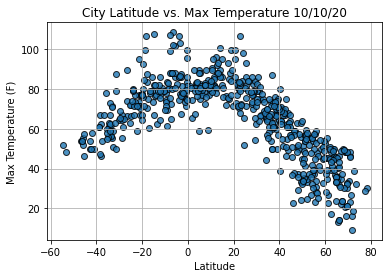

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

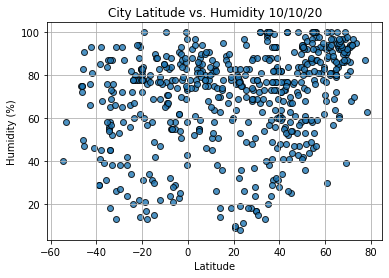

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

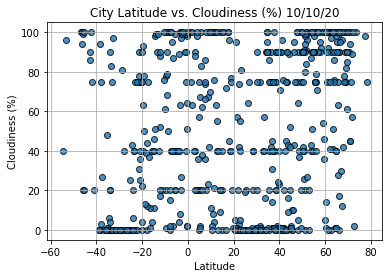

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

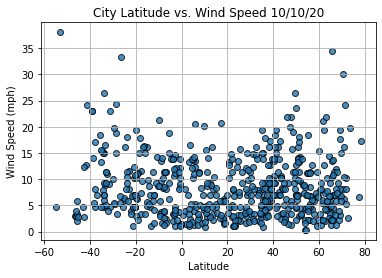

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

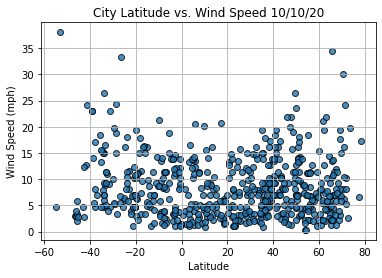

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()